Approach 1: 


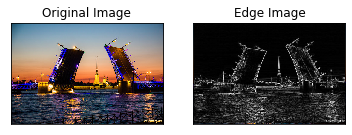

In [4]:
from __future__ import print_function
import numpy as np
import cv2
from collections import deque
from matplotlib import pyplot as plt
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

# define filters
vertical_filter = [[-1,-2,-1], [0,0,0], [1,2,1]]
horizontal_filter = [[-1,0,1], [-2,0,2], [-1,0,1]]

# read in the pinwheel image
img = plt.imread('br.png')

# get the dimensions of the image and initialize the edges image
n,m,d = img.shape
edges_img = img.copy()

# loop over all pixels in the image
for row in range(3, n-2):
    for col in range(3, m-2):
        
        #create little local 3x3 box
        local_pixels = img[row-1:row+2, col-1:col+2, 0]
        
        #apply the vertical filter
        vertical_transformed_pixels = vertical_filter*local_pixels
        #remap the vertical score
        vertical_score = vertical_transformed_pixels.sum()/4
        
        #apply the horizontal filter
        horizontal_transformed_pixels = horizontal_filter*local_pixels
        #remap the horizontal score
        horizontal_score = horizontal_transformed_pixels.sum()/4
        
        #combine the horizontal and vertical scores into a total edge score
        edge_score = (vertical_score**2 + horizontal_score**2)**.5
        
        #insert this edge score into the edges image
        edges_img[row, col] = [edge_score]*3

# remap the values in the 0-1 range in case they went out of bounds
edges_img = edges_img/edges_img.max()

# plot image
print('Approach 1: ')
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges_img,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()



Approach 2:


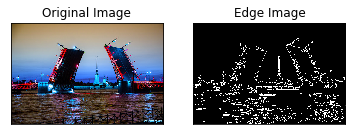

Select coordinates for the point to find closest edge to: 


Output()

In [5]:
from __future__ import print_function
import cv2
import argparse
import glob
import numpy as np
from collections import deque
from matplotlib import pyplot as plt

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

#function to perform nearest edge distance detection using BFS from multiple sources simultaneously
#function takes input image as the parameter and returns resulting matrix with calculated distances for each cell
#possible improvment: there is no need to check against all visited indices, only current and previous level
def updateMatrix(matrix):
        m = len(matrix)
        n = len(matrix[0])
        count = 0
        visited = set()
        dist = [[-1 for j in range(n)] for i in range(m)]
        level = set((i,j) for i in range(m) for j in range(n) if matrix[i][j] == 255)
        while level:
            for (i,j) in level:
                dist[i][j] = count
            count += 1
            visited |= level
            level = set((i + x,j + y) for (i,j) in level for (x,y) in [(0,1), (0,-1), (1,0), (-1,0)] 
                        if 0 <= i + x < m and 0 <= j + y < n and (i + x,j + y) not in visited)
        return dist

    
img = cv2.imread('br.png')
# turn image to the gray-scale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# apply blur
blurred = cv2.GaussianBlur(gray,(3,3),cv2.BORDER_DEFAULT)
# canny edge detection
edges = cv2.Canny(blurred,100,200)

# plot image
print( 'Approach 2:')
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()

#find distance to the closest edge from the given point
res=updateMatrix(edges)
def f(x, y):
   print("Minimal distance from the given coordinates to the closest edge: ")
   print(res[int(x)][int(y)])
    
print("Select coordinates for the point to find closest edge to: ")
x = widgets.IntSlider(description='x', max=len(img) - 1)
y = widgets.IntSlider(description='y', max=len(img[0]) - 1)
ui = widgets.HBox([x, y])
out = widgets.interactive_output(f, {'x': x, 'y': y})
display(ui, out)
